# sel training

clean the data and train the model to find the best predictor of sel score

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 

In [2]:
# data loading

def import_excel(file_path):
  # Load the Excel file
  xls = pd.ExcelFile(file_path)

  # Create a dictionary to store DataFrames
  dataframe = {}

  # Iterate through each sheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read each sheet into a DataFrame
      df = pd.read_excel(file_path, sheet_name=sheet_name)
      # Store the DataFrame with the sheet name as the key in the dictionary
      dataframe[sheet_name] = df
  return dataframe

# Now you have a dictionary where each key is the sheet name, and the value is the corresponding DataFrame
# For example, to access the DataFrame for the sheet named 'Sheet1':

# df_nigeria: basic info about nigeria dataset
# df_nigeria_add: contains sel data
df_nigeria = import_excel(r'Nigeria CuC Data - 2024 10 08.xlsx')
print("df_nigeria sheets " + str(df_nigeria.keys()))
df_nigeria_add = import_excel(r'Nigeria-Additional Data - 2024 10 15.xlsx')
print("df_nigeria_add sheets " + str(df_nigeria_add.keys()))

# loop through the dictionary and convert to dataframe



df_nigeria sheets dict_keys(['_fact_student_attendance', 'Note', '_fact_classes', '_dim_students', '_fact_reading_result', '_fact_student_reporting_rate'])
df_nigeria_add sheets dict_keys(['Literacy'])


In [3]:
# df_nigeria
df_classes = df_nigeria['_fact_classes']

# df_nigeria_add
df_sel = df_nigeria_add['Literacy']
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86998 entries, 0 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   86998 non-null  int64  
 1   AcademicYearName                                 86998 non-null  object 
 2   SchoolId                                         86998 non-null  int64  
 3   ClassId                                          86998 non-null  int64  
 4   ChildrenId                                       86998 non-null  int64  
 5   DeleteReasonId                                   593 non-null    float64
 6   CommunicationIssue                               41749 non-null  object 
 7   MemoryConcentration                              41749 non-null  object 
 8   Hearing                                          41749 non-null  object 
 9   Vision                      

In [4]:
# contains 86998 child - only 10228 have sel data
df_sel = df_sel[df_sel['SELMatrix_Get_along_with_people'].notnull()]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10228 entries, 66477 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10228 non-null  int64  
 1   AcademicYearName                                 10228 non-null  object 
 2   SchoolId                                         10228 non-null  int64  
 3   ClassId                                          10228 non-null  int64  
 4   ChildrenId                                       10228 non-null  int64  
 5   DeleteReasonId                                   0 non-null      float64
 6   CommunicationIssue                               10228 non-null  object 
 7   MemoryConcentration                              10228 non-null  object 
 8   Hearing                                          10228 non-null  object 
 9   Vision                       

In [5]:
has_duplicates = df_sel['ChildrenId'].duplicated().any()
# has_duplicates np.True_ 

df_duplicates = df_sel[df_sel['ChildrenId'].duplicated(keep=False)]
df_duplicates
#df_duplicates cycle - typo - delete

,AcademicYearId,AcademicYearName,SchoolId,ClassId,ChildrenId,DeleteReasonId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,IsCUCSatisfied?,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,skills_abilities,compare_others,life_goal,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,other_social_effects,other_psychological_effects,student_identity_type,student_identity_no,PrimaryCareGiver,PrimaryCareGiverOther,PrimaryCareGiverOtherRelation,BirthOrder,BirthOrderOther,HomeLanguage,HomeLanguageOther,Year,Cycle,Project
82583,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 4,NaN,12.0,Female,1-3_months_ago,No,No,No,No,6.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,Birth_Certificate,0,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane
83811,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,NaN,12.0,Female,1-3_months_ago,No,No,No,No,8.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane


In [6]:
df_sel = df_sel.drop(df_duplicates.index)
df_sel = df_sel.dropna(axis=1, how='all')
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10226 entries, 66477 to 86997
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10226 non-null  int64  
 1   AcademicYearName                                 10226 non-null  object 
 2   SchoolId                                         10226 non-null  int64  
 3   ClassId                                          10226 non-null  int64  
 4   ChildrenId                                       10226 non-null  int64  
 5   CommunicationIssue                               10226 non-null  object 
 6   MemoryConcentration                              10226 non-null  object 
 7   Hearing                                          10226 non-null  object 
 8   Vision                                           10226 non-null  object 
 9   Selfcare                     

If a person skips or misses an item, their scores should not be automatically computed, as their overall score will be artificially lower than others who complete the measure. If this happens, you can discard the incomplete result or consider methods of managing missing data
- 没有

### SCORING：

#### total score of an individual’s resilience

the items within the measures can be directly summed. For an unmodified 3-point measure, the minimum score is 17 and the maximum score is 51.

#### Personal Resilience Subscale Scores

sum 10 items: 1, 2, 3, 7, 9, 10, 12, 13, 14, 16. 

#### Caregiver/Relational Resilience Subscale Scores

sum 7 items: 4, 5, 6, 8, 11, 15, 17. 

### EVALUATING METHODS

#### indication

For the overall measure and subscales, higher scores indicate characteristics associated with stronger resilience."

#### comparing differences
"We recommend *comparing high scorers to low scorers* and investigating *potential reasons* for these differences. You may wish to *rank your sample by score* and *contrast the top half of scorers against the lower half* to determine what might account for these differences.

#### categorical analysis
consider that individuals scoring greater than one standard deviation above your sample average have *‘higher resilience’*, those between one standard deviation above and below the average have *‘moderate resilience’*, and those below one standard deviation have *‘low resilience’*.

In [7]:
df_sel.columns

Index(['AcademicYearId', 'AcademicYearName', 'SchoolId', 'ClassId',
       'ChildrenId', 'CommunicationIssue', 'MemoryConcentration', 'Hearing',
       'Vision', 'Selfcare', 'Walking/Climbing', 'IsElectricityAvailable?',
       'IsRadioTVAvailable?', 'IsTelephoneAvailable?', 'ChildrenGrade',
       'ChildrenAge', 'ChildrenGender', 'OOSC_Child', 'HasTelevision',
       'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle',
       'self_esteem_life_skills', 'skills_abilities', 'compare_others',
       'life_goal', 'SELMatrix_Get_along_with_people',
       'SELMatrix_Educations_is_important',
       'SELMatrix_Behave_in_different_situations',
       'SELMatrix_Parents_caregiver_take_care',
       'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
       'SELMatrix_People_like_to_spend_time_with_me',
       'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
       'SELMatrix_Get_along_at_school',
       'SELMatrix_Parents_caregiver_care_to_me',


In [43]:
# use two types of scoring
df_sel['CommunicationIssue'].unique()

array(['No difficulty', "don't_know", 'Some difficulty',
       'A lot of difficulty', 'Cannot do at all', 'Refused',
       'no_difficulty', 'some_difficulty', 'lot_difficulty',
       'Cannot_do_at_all'], dtype=object)

In [86]:
three_scoring = ['Yes', 'Sometimes', 'No']
five_scoring = ['A_lot', 'Quite_a_bit', 'A_little', 'Somewhat', 'Not_at_all']
df_sel_three_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(three_scoring)]
df_sel_five_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(five_scoring)]

In [22]:
# class_id change
import re
df_classes['simplified_name'] = df_classes['ClassName'].apply(lambda x: re.sub(r' Cluster \d+', '', x))

unique_simplified_names = df_classes['simplified_name'].unique()
simplified_to_newclassid = {name: idx for idx, name in enumerate(unique_simplified_names)}

df_classes['newclassid'] = df_classes['simplified_name'].map(simplified_to_newclassid)
classid_to_newclassid = dict(zip(df_classes['ClassID'], df_classes['newclassid']))

In [87]:
from sklearn.preprocessing import LabelEncoder
skip_column = ['other_social_effects', 'other_psychological_effects', 'student_identity_no', 'PrimaryCareGiverOther', 'PrimaryCareGiverOtherRelation', 'BirthOrderOther', 'HomeLanguageOther']

difficulty_column = ['CommunicationIssue', 'MemoryConcentration', 'Hearing', 'Vision', 'Selfcare', 'Walking/Climbing']
binary_column = ['IsElectricityAvailable?', 'IsRadioTVAvailable?', 'IsTelephoneAvailable?','HasTelevision',
    'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle']

difficulty_dict = {'no_difficulty': 1, 'some_difficulty':2, 'lot_difficulty':3,'Cannot_do_at_all':4, 'No difficulty':1, "don't_know":0, 'Some difficulty':2,
       'A lot of difficulty':3, 'Cannot do at all':4, 'Refused':0}
binary_dict = {'No':0, 'Yes':1, "Don't_know":2}
grade_dict = {'Grade 3':3, 'Grade 2':2, 'Grade 1':1, 'Grade 7':7, 'Grade 5':5, 'Grade 6':6,
    'Grade 4':4, 'Unknown':0, 'Grade 8':8, 'Grade 10':10}
gender_dict = {'Female':0, 'Male':1}
oosc_dict = {'4-6_months_ago':3, '1-3_months_ago':2, '7-9_months_ago':4, '1_month_ago':1, '10-12_months_ago':5, 'Never_went_to_school':0}
birth_dict = {'other_birthorder':0}
identity_dict = {'Not_Available':0, 'Birth_Certificate':1, 'NIN':2}

categorical_column = ['SELMatrix_Get_along_with_people',
    'SELMatrix_Educations_is_important',
    'SELMatrix_Behave_in_different_situations',
    'SELMatrix_Parents_caregiver_take_care',
    'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
    'SELMatrix_People_like_to_spend_time_with_me',
    'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
    'SELMatrix_Get_along_at_school',
    'SELMatrix_Parents_caregiver_care_to_me',
    'SELMatrix_Friends_care_about_me',
    'SELMatrix_Treat_fairly_at_community',
    'SELMatrix_Chance_to_show_the_growth',
    'SELMatrix_Feel_safe_with_family', 'SELMatrix_Chance_to_learn',
    'SELMatrix_likely_to_celebrate']
three_level_dict = {'Yes':float(3), 'Sometimes':float(2), 'No':float(1)}
five_level_dict = {'A_lot': 5 , 'Quite_a_bit': 4 , 'A_little': 3 , 'Somewhat': 2 , 'Not_at_all': 1}


In [88]:
# five_scoring - '2024-CuC & VYA-Cycle 1'
df_sel_five_scoring = df_sel_five_scoring.drop(columns=skip_column)
df_sel_five_scoring = df_sel_five_scoring.dropna(axis=1, how='all')
# df_sel_five_scoring['BirthOrder'] = df_sel_five_scoring['BirthOrder'].replace(birth_dict).infer_objects()
# df_sel_five_scoring['OOSC_Child'] = df_sel_five_scoring['OOSC_Child'].replace(oosc_dict).infer_objects()
# df_sel_five_scoring[difficulty_column] = df_sel_five_scoring[difficulty_column].replace(difficulty_dict).infer_objects()
# df_sel_five_scoring[binary_column] = df_sel_five_scoring[binary_column].replace(binary_dict).infer_objects()
# df_sel_five_scoring['ChildrenGrade'] = df_sel_five_scoring['ChildrenGrade'].replace(grade_dict).infer_objects()
# df_sel_five_scoring['ChildrenGender'] = df_sel_five_scoring['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_five_scoring[categorical_column] = df_sel_five_scoring[categorical_column].replace(five_level_dict).infer_objects()
# df_sel_five_scoring['student_identity_type'] = df_sel_five_scoring['student_identity_type'].replace(identity_dict).infer_objects()
df_sel_five_scoring['sel_total'] = df_sel_five_scoring[categorical_column].sum(axis=1)
df_sel_five_scoring['ClassId'] = df_sel_five_scoring['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_28445/2658950770.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring[categorical_column] = df_sel_five_scoring[categorical_column].replace(five_level_dict).infer_objects()


In [89]:
df_sel_three_vya = df_sel_three_scoring[df_sel_three_scoring['AcademicYearName'] == '2024-CuC & VYA-Cycle2']
df_sel_three = df_sel_three_scoring[df_sel_three_scoring['AcademicYearName'] == '2024-CuC-Cycle2']

In [ ]:
label_encoder = LabelEncoder()
categorical_cols = df_sel_five_scoring.select_dtypes(include='object').columns
for col in categorical_cols:
    df_sel_five_scoring[col] = label_encoder.fit_transform(df_sel_five_scoring[col])

categorical_cols = df_sel_three_vya.select_dtypes(include='object').columns
for col in categorical_cols:
    df_sel_three_vya[col] = label_encoder.fit_transform(df_sel_three_vya[col])

categorical_cols = df_sel_three.select_dtypes(include='object').columns
for col in categorical_cols:
    df_sel_three[col] = label_encoder.fit_transform(df_sel_three[col])

In [90]:
# df_sel_three_vya - include sel teaching
df_sel_three_vya = df_sel_three_vya.drop(columns=skip_column)
# df_sel_three_vya = df_sel_three_vya.drop(columns='OOSC_Child')
df_sel_three_vya = df_sel_three_vya.dropna(axis=1, how='all')
# df_sel_three_vya['BirthOrder'] = df_sel_three_vya['BirthOrder'].replace(birth_dict).infer_objects()
# df_sel_three_vya[difficulty_column] = df_sel_three_vya[difficulty_column].replace(difficulty_dict).infer_objects()
# df_sel_three_vya['ChildrenGrade'] = df_sel_three_vya['ChildrenGrade'].replace(grade_dict).infer_objects()
# df_sel_three_vya['ChildrenGender'] = df_sel_three_vya['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_three_vya[categorical_column] = df_sel_three_vya[categorical_column].replace(three_level_dict).infer_objects()
df_sel_three_vya['sel_total'] = df_sel_three_vya[categorical_column].sum(axis=1)
df_sel_three_vya['ClassId'] = df_sel_three_vya['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_28445/3599651793.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_three_vya[categorical_column] = df_sel_three_vya[categorical_column].replace(three_level_dict).infer_objects()


In [74]:
df_sel_three_vya.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4794 entries, 66477 to 82481
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   4794 non-null   int64  
 1   SchoolId                                         4794 non-null   int64  
 2   ClassId                                          4794 non-null   int64  
 3   ChildrenId                                       4794 non-null   int64  
 4   CommunicationIssue                               4794 non-null   object 
 5   MemoryConcentration                              4794 non-null   object 
 6   Hearing                                          4794 non-null   object 
 7   Vision                                           4794 non-null   object 
 8   Selfcare                                         4794 non-null   object 
 9   Walking/Climbing              

In [91]:
# df_sel_three - not include sel teaching
df_sel_three = df_sel_three.drop(columns=skip_column)
df_sel_three = df_sel_three.dropna(axis=1, how='all')
# df_sel_three = df_sel_three.drop(columns='OOSC_Child')
# mean_age = df_sel_three['ChildrenAge'].mean()
# df_sel_three['ChildrenAge'].fillna(mean_age, inplace=True)
# df_sel_three['BirthOrder'] = df_sel_three['BirthOrder'].replace(birth_dict).infer_objects()
# df_sel_three[difficulty_column] = df_sel_three[difficulty_column].replace(difficulty_dict).infer_objects()
# df_sel_three['ChildrenGrade'] = df_sel_three['ChildrenGrade'].replace(grade_dict).infer_objects()
# df_sel_three['ChildrenGender'] = df_sel_three['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_three[categorical_column] = df_sel_three[categorical_column].replace(three_level_dict).infer_objects()
df_sel_three['sel_total'] = df_sel_three[categorical_column].sum(axis=1)
#df_sel_three['ClassId'] = df_sel_three['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_28445/3684303625.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_three[categorical_column] = df_sel_three[categorical_column].replace(three_level_dict).infer_objects()


In [77]:
df_sel_three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 66601 to 82132
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   918 non-null    int64  
 1   SchoolId                                         918 non-null    int64  
 2   ClassId                                          918 non-null    int64  
 3   ChildrenId                                       918 non-null    int64  
 4   CommunicationIssue                               918 non-null    object 
 5   MemoryConcentration                              918 non-null    object 
 6   Hearing                                          918 non-null    object 
 7   Vision                                           918 non-null    object 
 8   Selfcare                                         918 non-null    object 
 9   Walking/Climbing               

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def training(df):
    X = df.drop(columns=['sel_total','ChildrenId'])  
    X = X.drop(columns=categorical_column)
    y = df['sel_total']  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
    'n_estimators': np.arange(10, 310, 30),  # n_estimators
    'max_depth': np.arange(10, 25, 5), # max_depth
    }

    rf = RandomForestRegressor(random_state=42)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                            cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best r2 score: {grid_search.best_score_}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    # cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')  # cv=5 
    # print(f'Cross-Validation R² Scores: {cv_scores}')
    print(f' R² Score: {np.mean(r2)}')

    # check importance of different features
    importances = best_model.feature_importances_
    feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feature_importances)
    return feature_importances

In [141]:
# 2024-CuC & VYA-Cycle 1
vya_cycle1 = training(df_sel_five_scoring)

Best parameters found: {'max_depth': np.int64(15), 'n_estimators': np.int64(100)}
Best r2 score: 0.6050177574512695
 R² Score: 0.6226506574062842
SchoolId                   0.380500
OOSC_Child                 0.099169
self_esteem_life_skills    0.097115
ChildrenGrade              0.059512
BirthOrder                 0.056739
ChildrenAge                0.039731
menustral_bathing          0.039077
HomeLanguage               0.027543
student_identity_type      0.027460
menustral_cloth            0.023527
menustral_frequency        0.022634
ChildrenGender             0.015357
menustral_age              0.015220
PrimaryCareGiver           0.014920
menustral_cycle            0.012573
menustral_normal           0.009840
HasMotorcycle              0.009040
IsElectricityAvailable?    0.007138
IsBikeAvailable?           0.007104
MemoryConcentration        0.006229
IsRadioTVAvailable?        0.005452
HasTelevision              0.005166
IsTelephoneAvailable?      0.004595
IsOx-cartAvailable?       

In [145]:
# 2024-CuC & VYA-Cycle2
vya_cycle2 = training(df_sel_three_vya)

Best parameters found: {'max_depth': np.int64(20), 'n_estimators': np.int64(220)}
Best r2 score: 0.6181951474070317
 R² Score: 0.6258416233244197
SchoolId                   0.254536
skills_abilities           0.125121
self_esteem_life_skills    0.103432
life_goal                  0.090704
ChildrenAge                0.066743
BirthOrder                 0.055173
ChildrenGrade              0.048149
compare_others             0.043027
menustral_bathing          0.031524
HomeLanguage               0.030550
menustral_frequency        0.016941
ChildrenGender             0.015575
menustral_age              0.014718
Vision                     0.013246
CommunicationIssue         0.012997
Walking/Climbing           0.011674
PrimaryCareGiver           0.011279
menustral_normal           0.011273
MemoryConcentration        0.011104
menustral_cycle            0.008759
Selfcare                   0.008588
Hearing                    0.007830
menustral_cloth            0.007057
AcademicYearId            

In [146]:
# 2024-CuC-Cycle2
cycle2 = training(df_sel_three)

Best parameters found: {'max_depth': np.int64(20), 'n_estimators': np.int64(220)}
Best r2 score: 0.6219794143651244
 R² Score: 0.7408463790377049
life_goal                  0.165349
self_esteem_life_skills    0.134202
skills_abilities           0.105460
ChildrenAge                0.083254
ChildrenGrade              0.074213
BirthOrder                 0.066666
SchoolId                   0.064979
compare_others             0.041892
menustral_bathing          0.036564
HomeLanguage               0.031642
menustral_frequency        0.028011
ChildrenGender             0.020941
Walking/Climbing           0.020547
menustral_normal           0.018721
menustral_cloth            0.016319
Vision                     0.014710
Hearing                    0.013233
menustral_cycle            0.012685
menustral_age              0.011340
MemoryConcentration        0.011189
Selfcare                   0.010137
PrimaryCareGiver           0.009179
CommunicationIssue         0.008767
AcademicYearId            

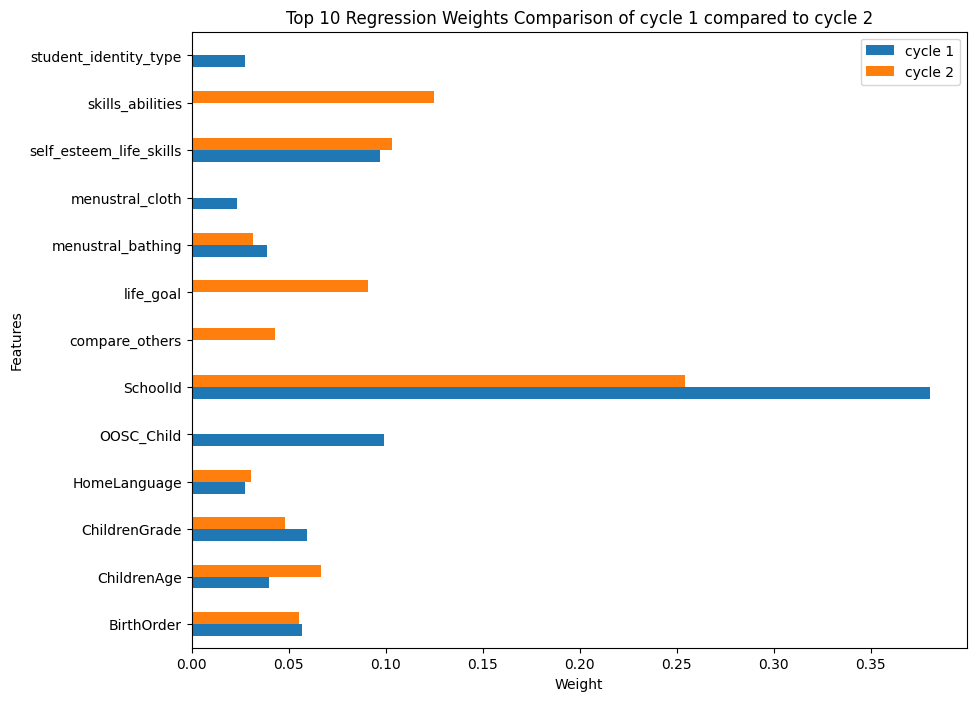

In [147]:
# sel training included - cycle 1 compared to cycle 2
import pandas as pd
import matplotlib.pyplot as plt

top10_model1 = vya_cycle1.abs().nlargest(10)
top10_model2 = vya_cycle2.abs().nlargest(10)

comparison_df = pd.DataFrame({
    'cycle 1': vya_cycle1[top10_model1.index],
    'cycle 2': vya_cycle2[top10_model2.index]
}).fillna(0) 

comparison_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Regression Weights Comparison of cycle 1 compared to cycle 2')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.legend(['cycle 1', 'cycle 2'])
plt.show()


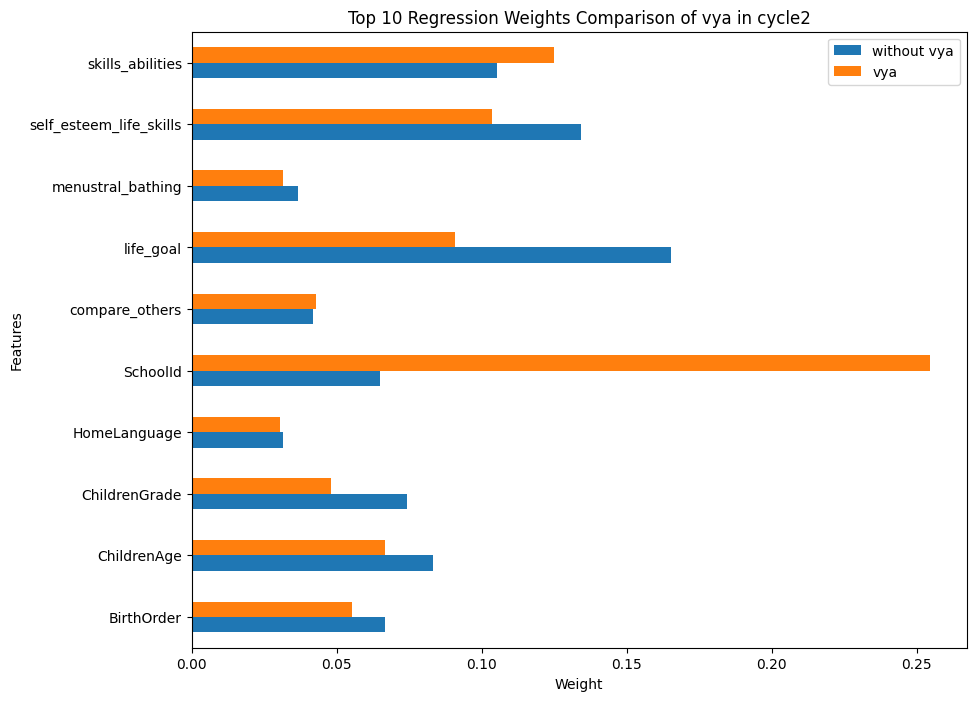

In [148]:
# sel training included - cycle 1 compared to cycle 2
import pandas as pd
import matplotlib.pyplot as plt

top10_model1 = cycle2.abs().nlargest(10)
top10_model2 = vya_cycle2.abs().nlargest(10)

comparison_df = pd.DataFrame({
    'without vya': cycle2[top10_model1.index],
    'vya': vya_cycle2[top10_model2.index]
}).fillna(0) 

comparison_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Regression Weights Comparison of vya in cycle2')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.legend(['without vya', 'vya'])
plt.show()
